## Model 1 Linear Regression (from linear regression class module)

In [6]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [7]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


Cleaning the data

In [8]:
# data preparation, enter in our csv file, or json if we go that route
df = pd.read_csv(Path('realtor-data.csv'))
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [9]:
# Find unique values for the status column
df.status.unique()

array(['for_sale', 'ready_to_build'], dtype=object)

In [10]:
# Drop status, street, and sold date columns
df = df.drop(["status", "street", "sold_date"], axis=1)
df.head()

,price,bed,bath,acre_lot,full_address,city,state,zip_code,house_size
0,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Adjuntas,Puerto Rico,601.0,920.0
1,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Adjuntas,Puerto Rico,601.0,1527.0
2,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",Juana Diaz,Puerto Rico,795.0,748.0
3,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",Ponce,Puerto Rico,731.0,1800.0
4,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",Mayaguez,Puerto Rico,680.0,NaN


In [49]:
import urllib.request
import json

res = urllib.request.urlopen("http://api.postcodes.io/postcodes/SE18XX").read()
data = json.loads(res)
print(data["result"]["longitude"], data["result"]["latitude"])

-0.116825 51.505767


In [11]:
# Drop rows that are null for price, city, zip code
real_estate_df = df.dropna(subset=['price', 'city', 'zip_code'])

In [12]:
# Drop all NAs (instead of filling with mean as above)
real_estate_df = real_estate_df.dropna()
real_estate_df.head()

,price,bed,bath,acre_lot,full_address,city,state,zip_code,house_size
0,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Adjuntas,Puerto Rico,601.0,920.0
1,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Adjuntas,Puerto Rico,601.0,1527.0
2,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",Juana Diaz,Puerto Rico,795.0,748.0
3,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",Ponce,Puerto Rico,731.0,1800.0
5,179000.0,4.0,3.0,0.46,"Bo Calabazas San Sebastian, San Sebastian, PR,...",San Sebastian,Puerto Rico,612.0,2520.0


In [13]:
# Dropping states with real estate sales that do not have a TJs

real_estate_df = real_estate_df[real_estate_df.state != "Puerto Rico"]
real_estate_df = real_estate_df[real_estate_df.state != "Virgin Islands"]
real_estate_df = real_estate_df[real_estate_df.state != "Wyoming"]
real_estate_df = real_estate_df[real_estate_df.state != "West Virginia"]
real_estate_df.head()

,price,bed,bath,acre_lot,full_address,city,state,zip_code,house_size
24231,180000.0,2.0,1.0,0.34,"23 Moore St, Agawam, MA, 01001",Agawam,Massachusetts,1001.0,676.0
24236,239900.0,3.0,1.0,0.46,"270 South St, Agawam, MA, 01001",Agawam,Massachusetts,1001.0,1196.0
24237,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",Agawam,Massachusetts,1001.0,2314.0
24238,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",Agawam,Massachusetts,1001.0,1276.0
24241,275000.0,4.0,2.0,0.11,"6-8 King Ave, Agawam, MA, 01001",Agawam,Massachusetts,1001.0,1732.0


In [14]:
real_estate_df.count()

price           405489
bed             405489
bath            405489
acre_lot        405489
full_address    405489
city            405489
state           405489
zip_code        405489
house_size      405489
dtype: int64

In [19]:
real_estate_df["price"].describe()

count    4.054890e+05
mean     7.983725e+05
std      1.507818e+06
min      5.000000e+02
25%      2.990000e+05
50%      4.749990e+05
75%      7.990000e+05
max      1.690000e+08
Name: price, dtype: float64

<AxesSubplot:>

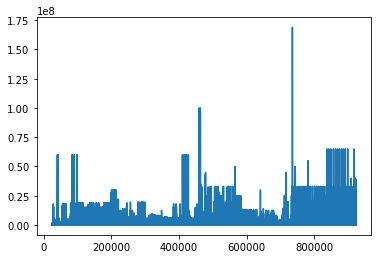

In [20]:
real_estate_df["price"].plot()

In [53]:
low_price=real_estate_df["price"]<200000
low_price.value_counts()

False    363225
True      42264
Name: price, dtype: int64

<AxesSubplot:>

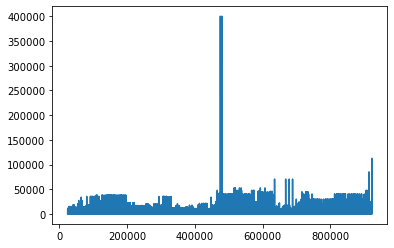

In [54]:
real_estate_df["house_size"].plot()

<AxesSubplot:ylabel='Frequency'>

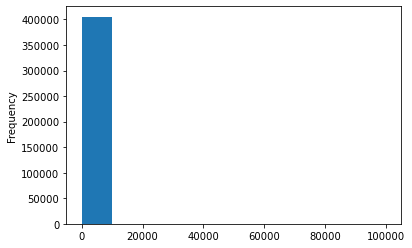

In [22]:
# Graph curve of the price & acre_lot & house_size
real_estate_df["acre_lot"].plot(kind= 'hist')

Using Sklearn, make a multiple linear regression model

In [26]:
real_estate_df=real_estate_df[["price","bed","bath","acre_lot","house_size"]]

In [27]:
#define X
import numpy as np
X=real_estate_df[["bed","bath","acre_lot","house_size"]]
X


,bed,bath,acre_lot,house_size
24231,2.0,1.0,0.34,676.0
24236,3.0,1.0,0.46,1196.0
24237,3.0,3.0,0.45,2314.0
24238,3.0,2.0,0.36,1276.0
24241,4.0,2.0,0.11,1732.0
...,...,...,...,...
923153,5.0,5.0,1.60,4522.0
923154,1.0,2.0,0.99,1052.0
923155,4.0,2.0,0.40,1650.0
923156,4.0,2.0,0.18,2123.0


In [28]:
#Define y predictor variable
y=real_estate_df['price']


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [32]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X_norm, y)

score = model.score(X_norm, y)
print(f"R2 Score: {score}")

R2 Score: 0.20341555395332522


In [37]:
y_pred = model.predict(X)
print(y_pred.shape)

(405489,)


ValueError: x and y must be the same size

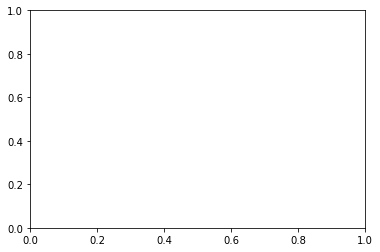

In [38]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [39]:
print(model.coef_)
print(model.intercept_)

[-5723926.15879996 45247889.89446668   251778.70838418 60983457.97718625]
218500.69023804134


In [34]:
# # Creating a StandardScaler instance.
# scaler = StandardScaler()
# # Fitting the Standard Scaler with the training data.
# X_scaler = scaler.fit(X_train)

# # Scaling the data.
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

In [35]:
# predictions = classifier.predict(X_test)
# pd.DataFrame({"Prediction": predictions, "Actual": y_test})

NameError: name 'classifier' is not defined

In [36]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, predictions)

NameError: name 'predictions' is not defined

In [ ]:
# predictions = classifier.predict(new_data)
# print("Classes are either 0 (purple) or 1 (yellow)")
# print(f"The new point was classified as: {predictions}")

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [101373, 405489]

## Model 2 - Random Forest Regression (based on challenge 17 homework)

In [57]:
!pip install imbalanced-learn==0.9.0

  Using cached scikit_learn-1.0.2-cp37-cp37m-macosx_10_13_x86_64.whl (7.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0


In [56]:
# !pip install scikit-learn==1.0

  Using cached scikit_learn-1.0-cp37-cp37m-macosx_10_13_x86_64.whl (7.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 1.0 which is incompatible.


In [59]:
# Resample the training data with the BalancedRandomForestClassifier
# figure out why i'm getting an attribute error, figured it out, had to pip install two items on top, per ask bcs.
from sklearn import BalancedRandomForestClassifier as BRFC
rf_model = BRFC(n_estimators =100, random_state=1)
rf_model.fit(X_train, y_train)


ImportError: cannot import name 'BalancedRandomForestClassifier' from 'sklearn' (/Users/skylarwhite/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/__init__.py)

In [ ]:
# Calculate predictions

y_pred = rf_model.predict(X_test)
y_pred

In [ ]:
# Calculated the balanced accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
balanced_accuracy_score(y_test,y_pred)

In [ ]:
# Display the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
# Print the imbalanced classification report

print(classification_report_imbalanced(y_test, y_pred))

In [ ]:
# List the features sorted in descending order by feature importance

importances = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
for importance in importances:
    print(f'{importance[1]}:  {importance[0]*100:.1f}%')

## Model 3 - XGBoost Regression (Gradient Boost) (didn't cover gradient boost in class, maybe only have 2 models....?)

In [ ]:
## Reference for random search on xgboost
## https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.best_estimator_


In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)


In [ ]:
## Predict Test results
y_pred = model.predict(X_test)


In [ ]:

print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))


In [ ]:

print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))


In [ ]:
# Feature importance, again, not sure if we'll need this part...

## Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=2,learning_rate=0.05,n_estimators=400, reg_lambda=0.001)
model.fit(X_train, y_train)



In [ ]:
## Function to include figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

In [ ]:
#not sure if we want a feature importance horizontal bar plot
my_plot_importance(model, (10,10))

